In [115]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [98]:
df_currency = pd.read_excel('../data/valutakurser_d.xlsx', header = 6, index_col = 0)
df_currency.index.names = ['Date']

In [99]:
df_msci_world = pd.read_excel('../data/historyIndex.xls', header = 6, index_col = 0, skipfooter =18)
df_msci_world.rename(columns={'WORLD Standard (Large+Mid Cap) ':'MSCI_World'}, inplace=True)

In [126]:
icheck = lambda x, xlist: True if x in xlist else False

index_msci_world = [icheck(x, df_currency.index) for x in df_MSCI_World.index]
index_usd = [icheck(x, df_MSCI_World.index) for x in df_currency.index]

usd_dates = df_currency.loc[index_usd, '1 USD']
msci_world_dates = df_msci_world.loc[index_msci_world, 'MSCI_World']

df = pd.concat([usd_dates, msci_world_dates], axis=1)
df['MSCI_World_NOK'] = df['MSCI_World'] * df['1 USD']

             1 USD  MSCI_World  MSCI_World_NOK
Date                                          
2014-04-17     NaN    1669.813             NaN
2014-04-18     NaN    1670.598             NaN
2014-04-21     NaN    1672.396             NaN
2014-04-22  5.9792    1681.981    10056.900795
2014-04-23  5.9791    1679.254    10040.427591
2014-04-24  5.9902    1681.155    10070.454681
2014-04-25  5.9898    1670.760    10007.518248
2014-04-28  5.9985    1672.649    10033.385027
2014-04-29  5.9894    1682.378    10076.434793
2014-04-30  5.9726    1687.742    10080.207869
2014-05-01     NaN    1690.394             NaN
2014-05-02  5.9411    1688.989    10034.452548
2014-05-05  5.9539    1689.773    10060.739465
2014-05-06  5.9104    1683.525     9950.306160
2014-05-07  5.9047    1684.043     9943.768702
2014-05-08  5.8611    1686.787     9886.427286
2014-05-09  5.9045    1683.365     9939.428642
2014-05-12  5.9132    1694.881    10022.170329
2014-05-13  5.9330    1697.988    10074.162804
2014-05-14  5

In [128]:
t = df.index
msci_usd = df['MSCI_World']
msci_nok = df['MSCI_World_NOK']
usd_nok = df['1 USD']

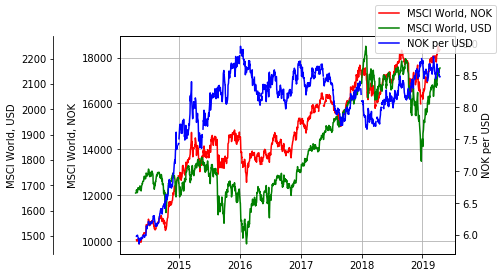

In [140]:
fig, ax_msci_nok = plt.subplots()

ax_msci_usd = ax_msci_nok.twinx()
ax_usd_nok = ax_msci_nok.twinx()
ax_msci_nok.grid()

ax_msci_usd.spines["left"].set_position(("axes", -0.2))
ax_msci_usd.yaxis.set_label_position('left')
ax_msci_usd.yaxis.set_ticks_position('left')

ax_msci_nok.plot(t, msci_nok, "r", label = 'MSCI World, NOK')
ax_msci_usd.plot(t, msci_usd, "g", label = 'MSCI World, USD')
ax_usd_nok.plot(t, usd_nok, "b", label = 'NOK per USD')

ax_msci_nok.set_ylabel("MSCI World, NOK")
ax_msci_usd.set_ylabel("MSCI World, USD")
ax_usd_nok.set_ylabel("NOK per USD")

fig.legend()